In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.1 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.0 MB/s eta 0:00:00


In [3]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.0 MB/s eta 0:00:00


In [4]:
!pip install 'qiskit[visualization]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e39d0f170167d9c4874e6a1324c000a26ff0e73e92cba87aa35cb0244d0df6e2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [5]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

# import basic plot tools and circuits
import matplotlib.pyplot as plt
from qiskit.circuit.library import QFT

#Example T-Gate -> phase = (pi/4) => theta =1/8

In [6]:
circuit = QuantumCircuit(4, 3)
circuit.x(3)

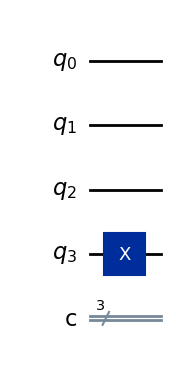

In [7]:
circuit.draw(output='mpl')

In [8]:
circuit.h(range(3))

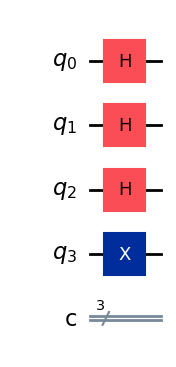

In [9]:
circuit.draw(output='mpl')

In [10]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        circuit.cp(math.pi/4, counting_qubit, 3); # controlled-T
    repetitions *= 2


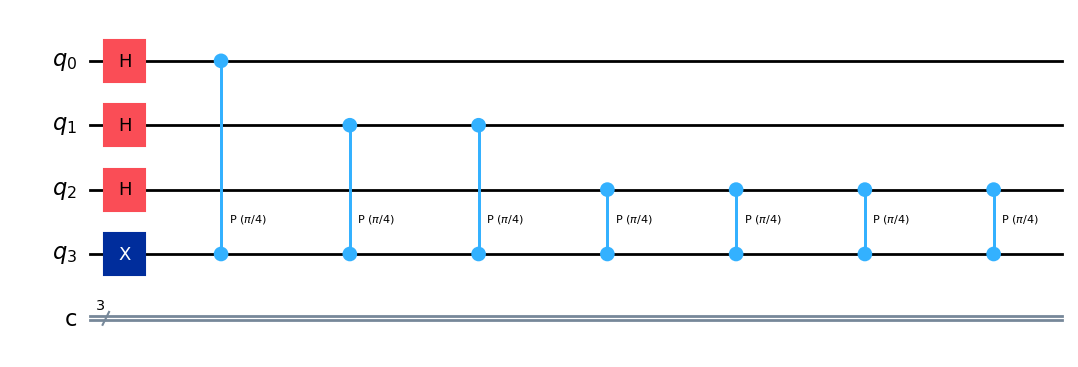

In [11]:
circuit.draw(output='mpl')

In [12]:
circuit.barrier()
circuit = circuit.compose(QFT(3, inverse=True), [0,1,2])
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

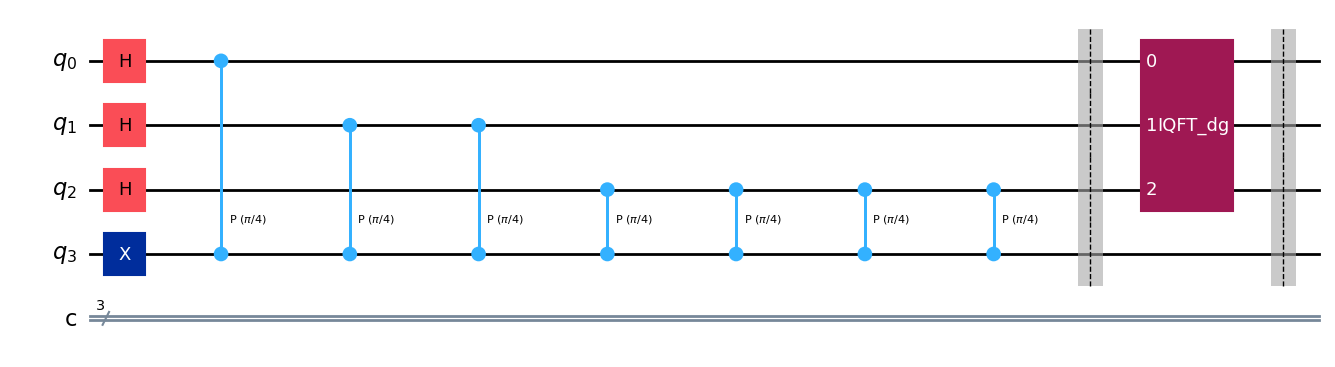

In [13]:
circuit.draw(output='mpl')

In [14]:
for n in range(3):
    circuit.measure(n,n)

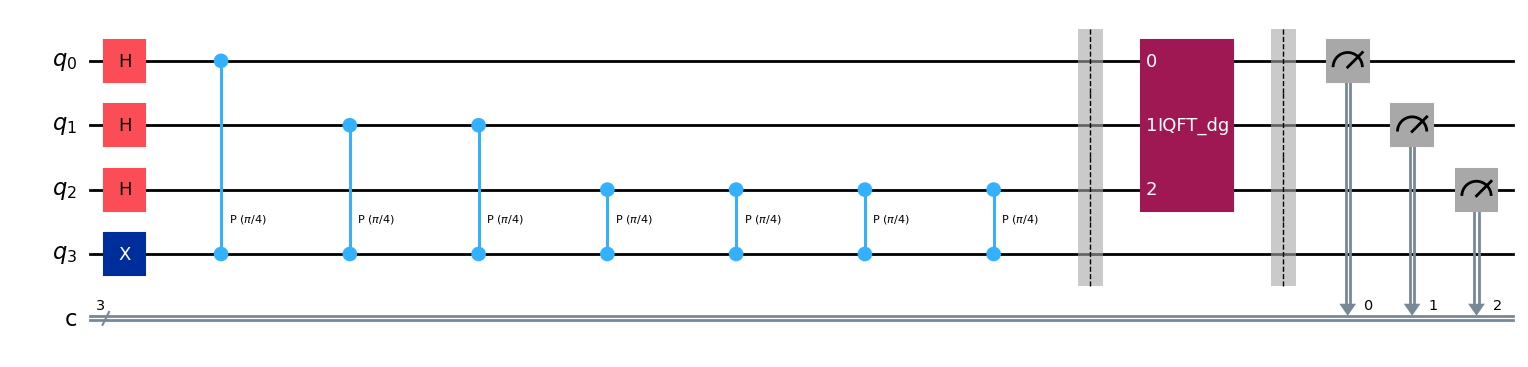

In [15]:
circuit.draw(output='mpl')

## Simulation

In [16]:
from qiskit import transpile

In [17]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe1 = transpile(circuit, aer_sim)
results = aer_sim.run(t_qpe1, shots=shots).result()
answer = results.get_counts()

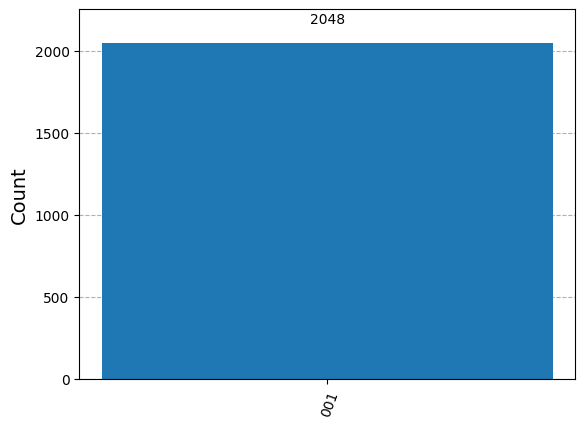

In [18]:
plot_histogram(answer)

#Passer a la simulation à un ordinateur quantique réel

In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

In [20]:
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='YourToken'
)

In [21]:
print(service)

<QiskitRuntimeService>


In [22]:
# Get the least busy backend
backend = service.least_busy(operational=True, simulator=False)

# Transpile the circuit for the backend
circuit_transpiled = transpile(circuit, backend=backend)

# Create a sampler and submit the transpiled circuit
sampler = Sampler(backend)
job = sampler.run([circuit_transpiled])
# Get the results
result = job.result()

dist = result[0].data.c.get_counts()

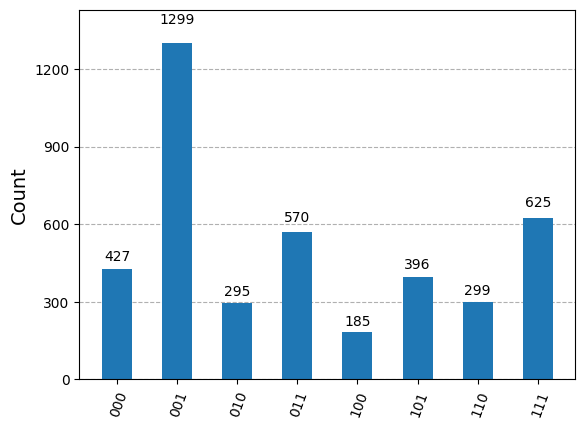

In [23]:
plot_histogram(dist)

# Handamard Gate

In [24]:
num_counting_qubits = 4
circuit_H = QuantumCircuit(num_counting_qubits + 1, num_counting_qubits)

In [25]:
for qubit in range(num_counting_qubits):
    circuit_H.h(qubit)

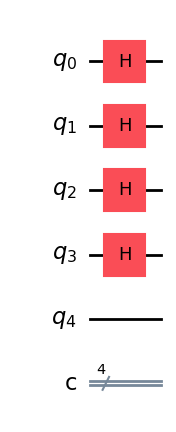

In [26]:
circuit_H.draw(output='mpl')

In [27]:
circuit_H.h(num_counting_qubits)

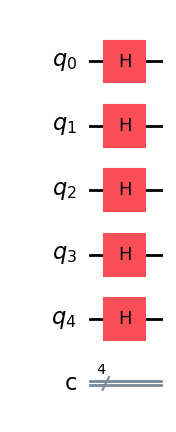

In [28]:
circuit_H.draw(output='mpl')

In [29]:
repetitions = 1
for counting_qubit in range(num_counting_qubits):
    for i in range(repetitions):
        circuit_H.ch(counting_qubit, num_counting_qubits) # controlled-H
    repetitions *= 2

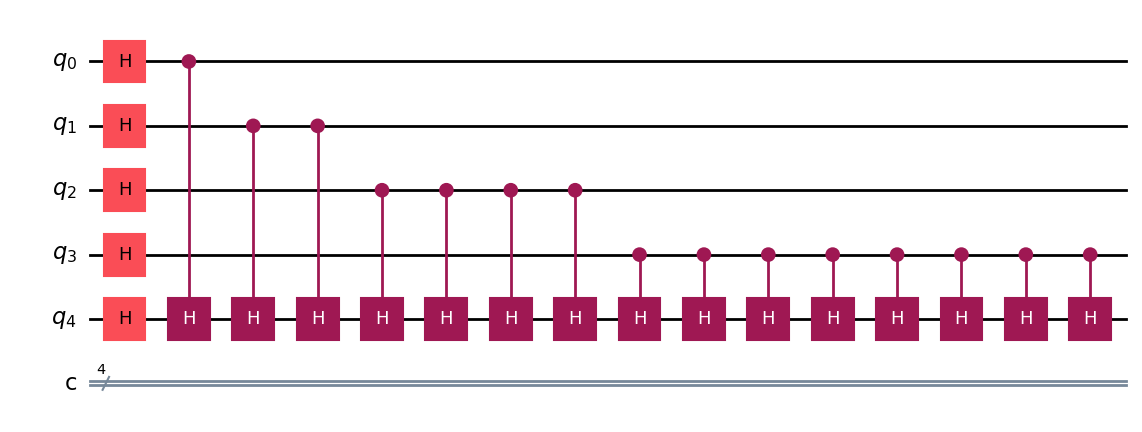

In [30]:
circuit_H.draw(output='mpl')

In [31]:
circuit_H.barrier()
# Apply inverse QFT
circuit_H = circuit_H.compose(QFT(num_counting_qubits, inverse=True), range(num_counting_qubits))
# Measure
circuit_H.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

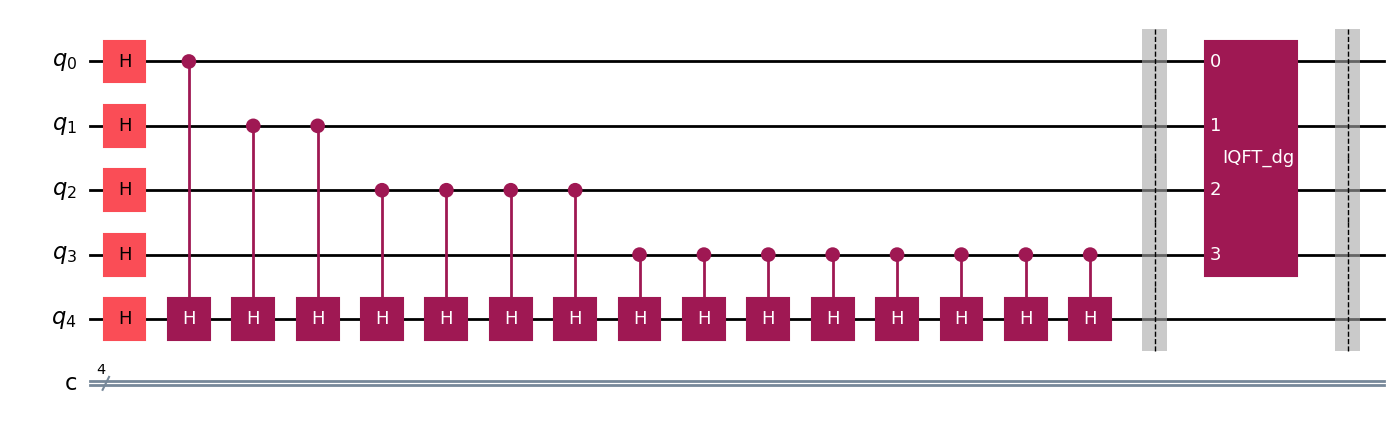

In [32]:
circuit_H.draw(output='mpl')

In [33]:
for n in range(num_counting_qubits):
    circuit_H.measure(n,n)

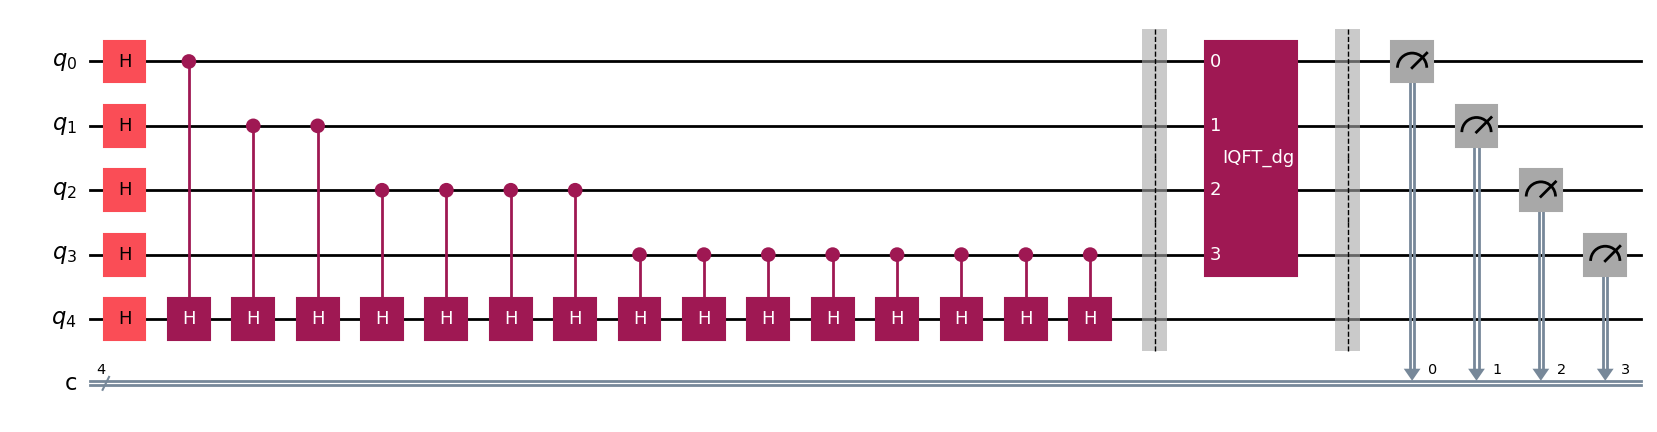

In [34]:
circuit_H.draw(output='mpl')

## Simulation

In [35]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe1 = transpile(circuit_H, aer_sim)
results = aer_sim.run(t_qpe1, shots=shots).result()
answer = results.get_counts()

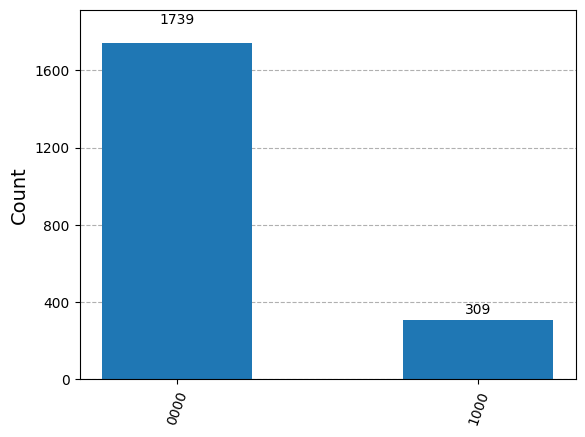

In [36]:
plot_histogram(answer)

## Ordinateur Quantique IBM

In [37]:
# Get the least busy backend
backend = service.least_busy(operational=True, simulator=False)

# Transpile the circuit for the backend
circuit_H_transpiled = transpile(circuit_H, backend=backend)

# Create a sampler and submit the transpiled circuit
sampler = Sampler(backend)
job = sampler.run([circuit_H_transpiled])
# Get the results
result_H = job.result()

dist_H = result_H[0].data.c.get_counts()

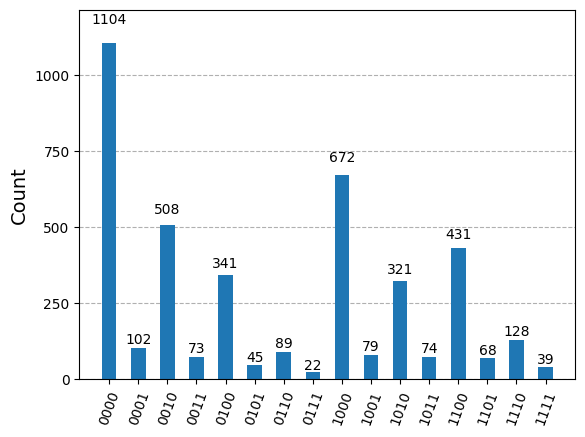

In [38]:
plot_histogram(dist_H)